## Early onset of Alzheimer's Prediction

#### This project is about predicting early diagnosis of Alzheimer's in patients along with identifying the top 10 and bottom 10   features which can lead to Alzheimer's using feature importance.  It explores data cleaning and exploratory data analysis by using techniques like log transformations for skewed target variable to decrease biasness,one hot encoding of categorical variables,filling the missing values using KNN, data balancing using SMOTE as the dataset is imbalanced and is biased and finally scaling. Evaluation of models is done using parameters like auc score,recall,precisoon,accuracy and ROC curve is plotted. classification models like random Forest,Logistic regression and gradient boosting are used and their performances are compared using AUC score,recall,accuracy and precision.

#### To ensure that model hasnt overfitted the f1-score is calculated for both classes. Cross validation is used to check that model is not overfitting by any chance and hyperparameter tuning is done using Grid Search to pick best parameters for models which can give optimized model.

####  The best performing model is known to be Logistic Regression giving 0.81 AUC score and 0.88 classification accuracy.

In [3]:

import numpy as np
import sklearn as sk
import pandas as pd
import os
data=pd.read_csv('C:/Users/admin/Documents/Alzheimers-Prediction-master/data_3.csv')

## Variable Descriptions
###### directory.id Id assigned to imaging directories. Not from LONi data
###### Subject (PTID) Participant ID
###### RID Participant roster ID
###### Image.Data.ID MRI ID
###### Modality Image type
###### Visit 1=screening scan
###### Acq.Date MRI date
###### DX.bl Diagnosis at baseline
###### EXAMDATE Examination Date
###### AGE Age at baseline
###### PTGENDER Sex
###### PTEDUCAT Years of Education
###### PTETHCAT Ethnicity
###### PTRACCAT Race
###### APOE4 APOE4 genotype
###### MMSE MMSE score on cognitive test
###### imputed_genotype Challenge specific designation, TRUE=has imputed genotypes
###### APOE Genotype APOE allele 1 and allele 2 genotypes


### Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 19 columns):
directory.id               628 non-null object
Subject                    628 non-null object
RID                        628 non-null int64
Image.Data.ID              628 non-null int64
Modality                   628 non-null object
Visit                      628 non-null int64
Acq.Date                   628 non-null object
DX.bl                      628 non-null object
EXAMDATE                   628 non-null object
AGE                        628 non-null float64
PTGENDER                   628 non-null object
PTEDUCAT                   628 non-null int64
PTETHCAT                   628 non-null object
PTRACCAT                   628 non-null object
APOE4                      628 non-null int64
MMSE                       628 non-null int64
imputed_genotype           627 non-null object
APOE Genotype              628 non-null object
Dx Codes for Submission    628 non-null object
dtypes:

In [2]:
data.isnull().sum()    

directory.id               0
Subject                    0
RID                        0
Image.Data.ID              0
Modality                   0
Visit                      0
Acq.Date                   0
DX.bl                      0
EXAMDATE                   0
AGE                        0
PTGENDER                   0
PTEDUCAT                   0
PTETHCAT                   0
PTRACCAT                   0
APOE4                      0
MMSE                       0
imputed_genotype           1
APOE Genotype              0
Dx Codes for Submission    0
dtype: int64

In [ ]:
#KNN TO FILL UP MISSING VALUES.
from fancyimpute import KNN
X_fill = KNN(k=4).fit_transform(data)

In [ ]:
X_fill = pd.DataFrame(data=X_fill)
X_fill.columns = data.columns
X_fill.isnull().any().sum()

In [5]:
data.info()   # now no more missing values present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 0 to 627
Data columns (total 19 columns):
directory.id               627 non-null object
Subject                    627 non-null object
RID                        627 non-null int64
Image.Data.ID              627 non-null int64
Modality                   627 non-null object
Visit                      627 non-null int64
Acq.Date                   627 non-null object
DX.bl                      627 non-null object
EXAMDATE                   627 non-null object
AGE                        627 non-null float64
PTGENDER                   627 non-null object
PTEDUCAT                   627 non-null int64
PTETHCAT                   627 non-null object
PTRACCAT                   627 non-null object
APOE4                      627 non-null int64
MMSE                       627 non-null int64
imputed_genotype           627 non-null object
APOE Genotype              627 non-null object
Dx Codes for Submission    627 non-null object
dtypes:

In [203]:
data.head(3)

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,9/1/2005,AD,9/12/2005,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/2005,LMCI,11/8/2005,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,9/2/2005,CN,9/7/2005,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN


In [6]:
X = data
Y = data['DX.bl']


# unnecessary  (features) are removed'
rem_columns = list(X.columns)[0:9]
rem_columns.append('Dx Codes for Submission')
print('Removing columns:', rem_columns)

X = X.drop(rem_columns, axis=1)  # to remove the unnecessary columns from X

features = list(X.columns)
X.head(5)

Removing columns: ['directory.id', 'Subject', 'RID', 'Image.Data.ID', 'Modality', 'Visit', 'Acq.Date', 'DX.bl', 'EXAMDATE', 'Dx Codes for Submission']


,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype
0,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4"
1,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3"
2,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3"
3,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3"
4,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4"


In [7]:
num=X.select_dtypes('number').columns    #numerical columns
num

Index(['AGE', 'PTEDUCAT', 'APOE4', 'MMSE'], dtype='object')

In [8]:
M=Y.tolist()

 ### To change to binary classification

In [9]:
j=0                
for i in range(0,len(M)):
    if M[i] == 'LMCI':
        M[i]='Not-AD'
    if M[i] == 'CN':
        M[i]='Not-AD'
    

In [10]:
Z=pd.Series(M)
Z

0          AD
1      Not-AD
2      Not-AD
3      Not-AD
4          AD
        ...  
622    Not-AD
623    Not-AD
624    Not-AD
625    Not-AD
626    Not-AD
Length: 627, dtype: object

In [11]:
factor=pd.factorize(Z)
Z=factor[0]
definitions=factor[1]
print(definitions)

Index(['AD', 'Not-AD'], dtype='object')


In [12]:
Z=pd.Series(Z)

In [13]:
Z   # 0 is for the patient who alzeihmers and 1 is for patient without alzeihmer's 

0      0
1      1
2      1
3      1
4      0
      ..
622    1
623    1
624    1
625    1
626    1
Length: 627, dtype: int64

In [14]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


#### Log transforming skew variables

[Text(0, 0.5, 'frequency'),
 Text(0.5, 0, 'value'),
 Text(0.5, 1.0, 'after np.log1p')]

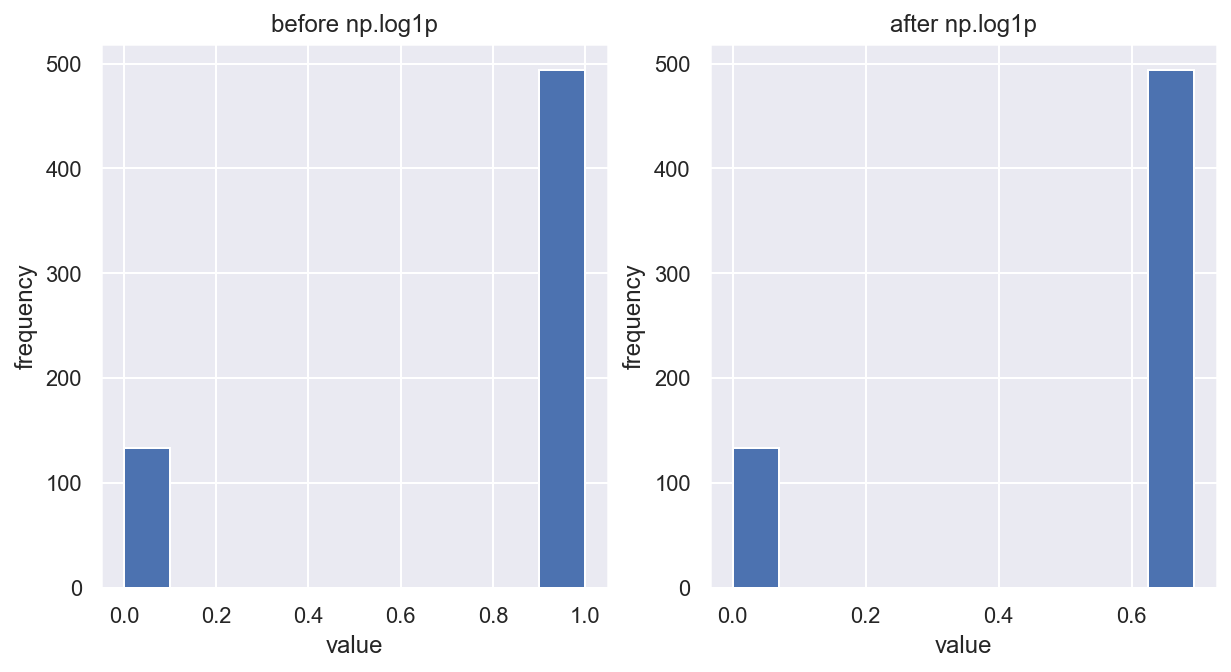

In [17]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.
import matplotlib.pyplot as plt
# Choose a field
#field = "SalePrice"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
Z.hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
Z.apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')

### Understanding numerical and categorical Variables Distribution

In [15]:
numerical=num.tolist()
numerical

['AGE', 'PTEDUCAT', 'APOE4', 'MMSE']

In [16]:
one_hot_encode_cols = X.dtypes[X.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
one_hot_encode_cols

['PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype', 'APOE Genotype']

In [17]:


print('Categorical variable distributions:\n')

for var in one_hot_encode_cols:
    print('\nDistribution of', var)
    
    print(X[var].value_counts())

Categorical variable distributions:


Distribution of PTGENDER
Male      363
Female    264
Name: PTGENDER, dtype: int64

Distribution of PTETHCAT
Not Hisp/Latino    616
Hisp/Latino          8
Unknown              3
Name: PTETHCAT, dtype: int64

Distribution of PTRACCAT
White    583
Black     31
Asian     13
Name: PTRACCAT, dtype: int64

Distribution of imputed_genotype
True     466
False    161
Name: imputed_genotype, dtype: int64

Distribution of APOE Genotype
3,3    275
3,4    221
4,4     71
2,3     45
2,4     13
2,2      2
Name: APOE Genotype, dtype: int64


Number Variables Distributions:



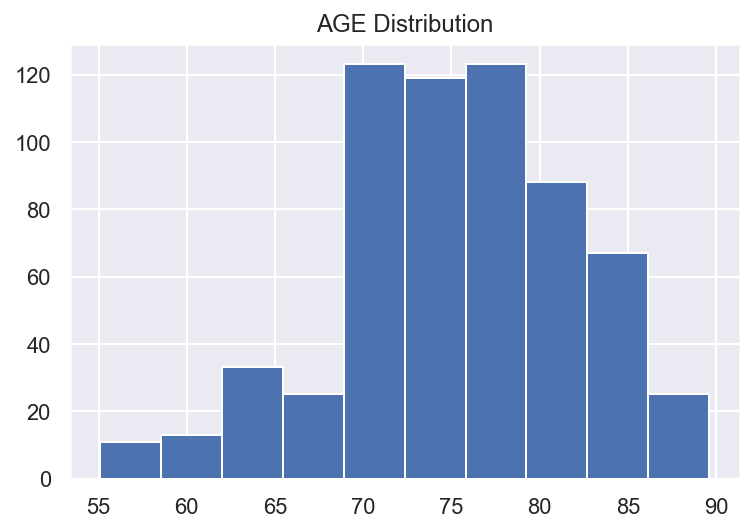

count    627.000000
mean      75.161882
std        6.689979
min       55.100000
25%       71.200000
50%       75.400000
75%       80.000000
max       89.600000
Name: AGE, dtype: float64


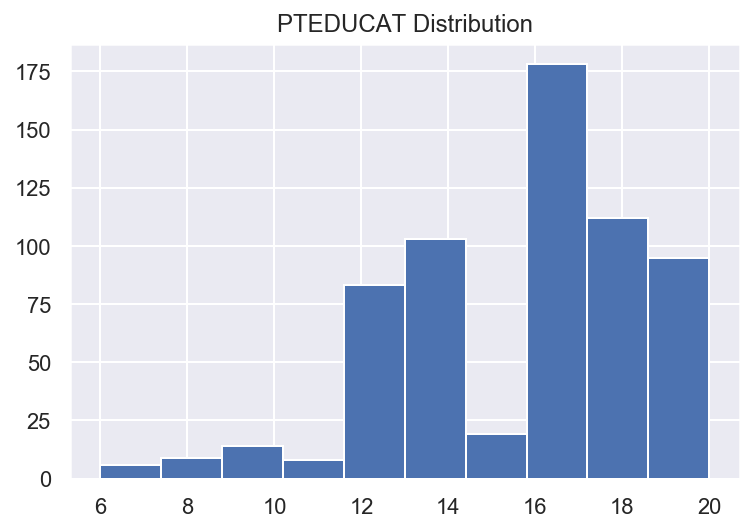

count    627.000000
mean      15.612440
std        2.978845
min        6.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       20.000000
Name: PTEDUCAT, dtype: float64


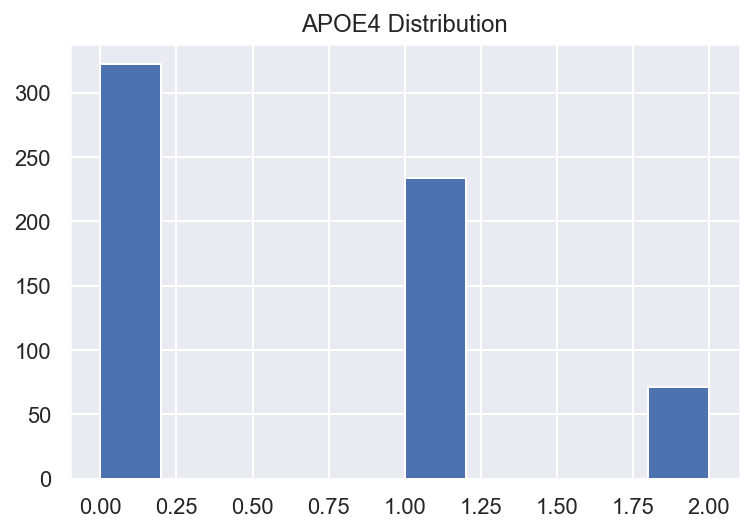

count    627.000000
mean       0.599681
std        0.683582
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: APOE4, dtype: float64


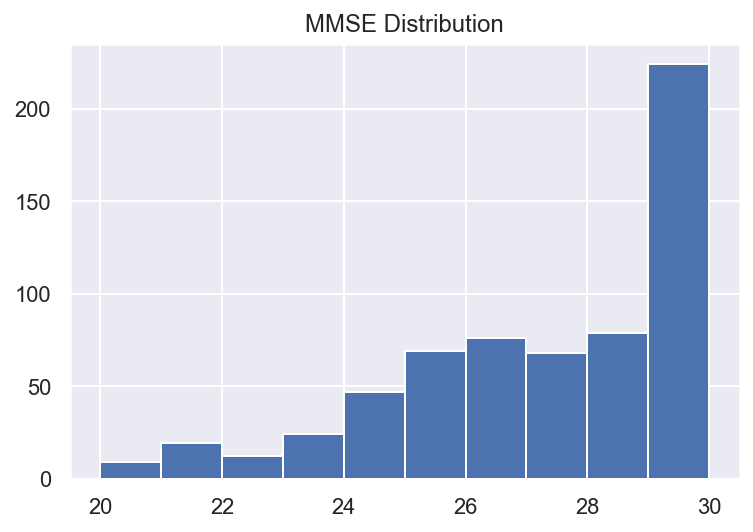

count    627.000000
mean      26.921850
std        2.563934
min       20.000000
25%       25.000000
50%       27.000000
75%       29.000000
max       30.000000
Name: MMSE, dtype: float64


In [18]:
print('Number Variables Distributions:\n')
import matplotlib.pyplot as plt
for var in numerical:
    plt.hist(X[var], bins=10)
    plt.title(var + ' Distribution')
    plt.show()
    
    # descriptive stats
    print(X[var].describe())

### Target variable distributions
### DX.bl is the target variable.

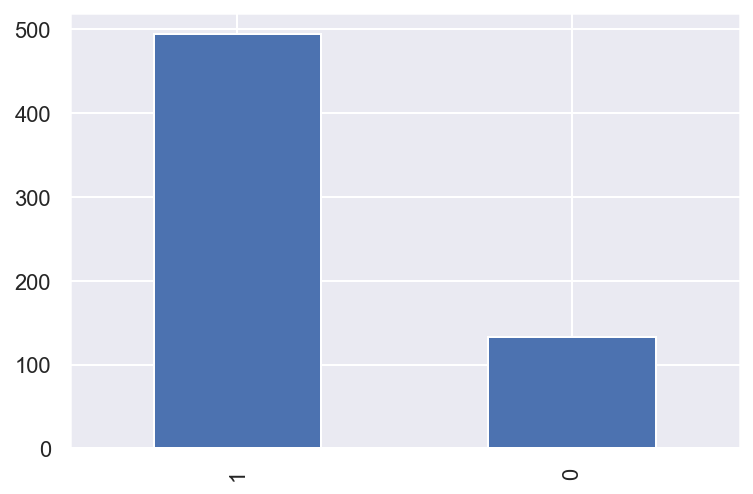

In [19]:
 
Z.value_counts().plot(kind='bar')  


### conversion to 1-hot encoding for every categorical variable

In [20]:

for var in one_hot_encode_cols:
    
    
    #getting 1-hot and replacing original column with the >= 2 categories as columns
    one_hot_df = pd.get_dummies(X[var])
    X = pd.concat([X, one_hot_df], axis=1)
    X = X.drop(var, axis=1)

In [21]:
X.columns

Index([            'AGE',        'PTEDUCAT',           'APOE4',
                  'MMSE',          'Female',            'Male',
           'Hisp/Latino', 'Not Hisp/Latino',         'Unknown',
                 'Asian',           'Black',           'White',
                   False,              True,             '2,2',
                   '2,3',             '2,4',             '3,3',
                   '3,4',             '4,4'],
      dtype='object')

In [24]:
import six
import sys
try:
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
sys.modules['sklearn.externals.six'] = six




### SPLITTING TO TRAIN/TEST


In [25]:
from sklearn.model_selection import train_test_split

X_trainE, X_testE, y_trainE, y_testE = train_test_split(X, Z, test_size=.2)

print('X_train:', X_trainE.shape, '\ty_train:', y_trainE.shape)
print('X_test:', X_testE.shape, '\ty_test:', y_testE.shape)
num_test = X_testE.shape[0]

X_train: (501, 20) 	y_train: (501,)
X_test: (126, 20) 	y_test: (126,)


### DATA BALANCING

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE(random_state=0)

columns = X_trainE.columns
c=y_trainE.columns


X_trainEa,y_trainE = over.fit_sample(X_trainE, y_trainE)

X_trainEa = pd.DataFrame(data=X_trainE,columns=columns )

y_trainEa= pd.DataFrame(data=y_trainE,columns=c)


X_smote_train = X_trainEa
Y_smote_train = y_trainEa

### SCALING

In [27]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_trainE=scaler.fit_transform(X_trainE)
X_testE=scaler.fit_transform(X_testE)

### EVALUATION OF MODELS

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
print('Validation Accuracy Logistic Regression after cross validation= ', format(cross_val_score(log_clf, X_trainE, y_trainE, cv=5).mean(), '.2%'))

Validation Accuracy Logistic Regression after cross validation=  88.03%


In [29]:
rf_clf = RandomForestClassifier(n_estimators=200)
print('Validation Accuracy of Random Forest after cross validation = ', format(cross_val_score(rf_clf, X_trainE, y_trainE, cv=5).mean(), '.2%'))

Validation Accuracy of Random Forest after cross validation =  87.04%


In [30]:
#Fitting on random_forest 
rf_clf.fit(X_trainE, y_trainE)

RandomForestClassifier(n_estimators=200)

In [36]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score


def res(y_true, y_pred):
    
    auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred )
    precision = precision_score(y_true, y_pred)
   
    #print('AUC',auc)
    #print('ACCURACY',accuracy)
    #print('RECALL',recall)
    #print('PRECISION',precision)
    
    return auc, accuracy, recall, precision

### LOGISTIC REGRESSION

In [32]:
log_clf.fit(X_trainE, y_trainE)

#log_clf_preds = log_clf.predict(X_testE)
    
#log_clf_accuracy = (log_clf_preds == y_testE)
#print('Test Accuracy of Logistic regression =', format( np.sum(log_clf_accuracy)/num_test, '.2%'))

LogisticRegression(max_iter=1000000, multi_class='multinomial')

In [37]:
y_train_predictions = log_clf.predict(X_trainE)
y_valid_predictions = log_clf.predict(X_testE)

print('Logistic REgression')
#print('Training:')
Lf_train_auc, Lf_train_accuracy, Lf_train_recall, Lf_train_precision =res(y_trainE,y_train_predictions)
#print('Validation:')
Lf_valid_auc, Lf_valid_accuracy, Lf_valid_recall, Lf_valid_precision = res(y_testE,y_valid_predictions)

Logistic REgression


### RANDOM FOREST

In [38]:
y_train_predictions_r = rf_clf.predict(X_trainE)
y_valid_predictions_r = rf_clf.predict(X_testE)
print('random forest')
#print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision =res(y_trainE,y_train_predictions_r)
#print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision = res(y_testE,y_valid_predictions_r)

random forest


### GRADIENT BOOSTING

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_trainE, y_trainE)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [40]:
y_train_predictions_a = gbc.predict(X_trainE)
y_valid_predictions_a = gbc.predict(X_testE)
print('Gradient Boosting Classifier')
#print('Training:')
f_train_auc, f_train_accuracy, f_train_recall, f_train_precision =res(y_trainE,y_train_predictions_a)
#print('Validation:')
f_valid_auc, f_valid_accuracy, f_valid_recall, f_valid_precision = res(y_testE,y_valid_predictions_a)

Gradient Boosting Classifier


### ANALYZING RESULTS OF ALL MODELS

In [41]:

df_results = pd.DataFrame({'classifier':['GB','GB','RF','RF','LR','LR'],
                           'data_set':['train','valid']*3,
                          'auc':[f_train_auc, f_valid_auc,rf_train_auc, rf_valid_auc,Lf_train_auc, Lf_valid_auc,],
                          'accuracy':[f_train_accuracy,  f_valid_accuracy,rf_train_accuracy,  rf_valid_accuracy,Lf_train_accuracy,  Lf_valid_accuracy,],
                          'recall':[f_train_recall, f_valid_recall,rf_train_accuracy,  rf_valid_accuracy,Lf_train_accuracy,  Lf_valid_accuracy,],
                          'precision':[f_train_precision, f_valid_precision,rf_train_accuracy,  rf_valid_accuracy,Lf_train_accuracy,  Lf_valid_accuracy,]
              })

In [42]:
df_results

,classifier,data_set,auc,accuracy,recall,precision
0,GB,train,1.000000,1.000000,1.000000,1.000000
1,GB,valid,0.720761,0.849206,0.958763,0.861111
2,RF,train,1.000000,1.000000,1.000000,1.000000
3,RF,valid,0.720761,0.849206,0.849206,0.849206
4,LR,train,0.806542,0.890220,0.890220,0.890220
5,LR,valid,0.767330,0.865079,0.865079,0.865079


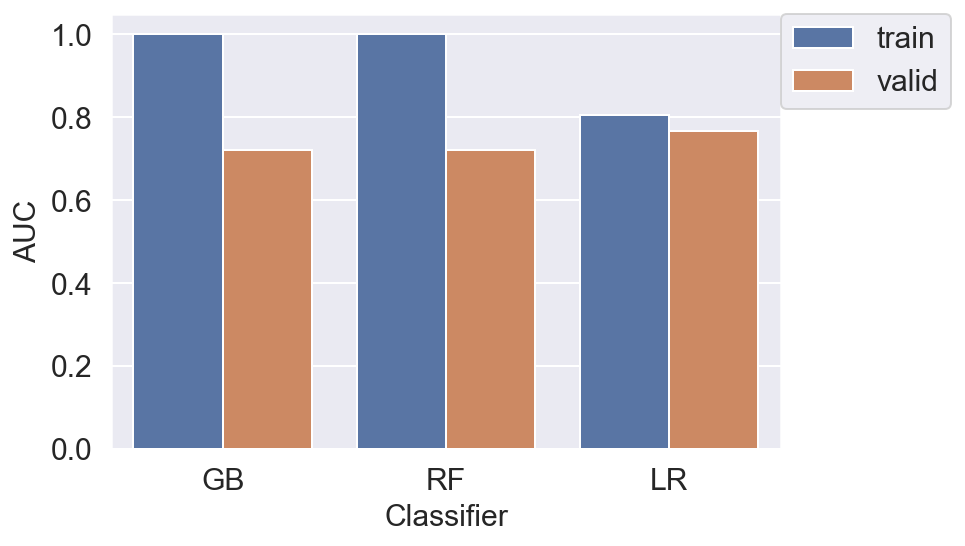

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()


### ROC CURVE FOR LOGISTIC REGRESSION

In [55]:

from sklearn.metrics import roc_curve
pred_prob1 = log_clf.predict_proba(X_testE)
fpr1, tpr1, thresh1 = roc_curve(y_testE, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_testE))]
p_fpr, p_tpr, _ = roc_curve(y_testE, random_probs, pos_label=1)

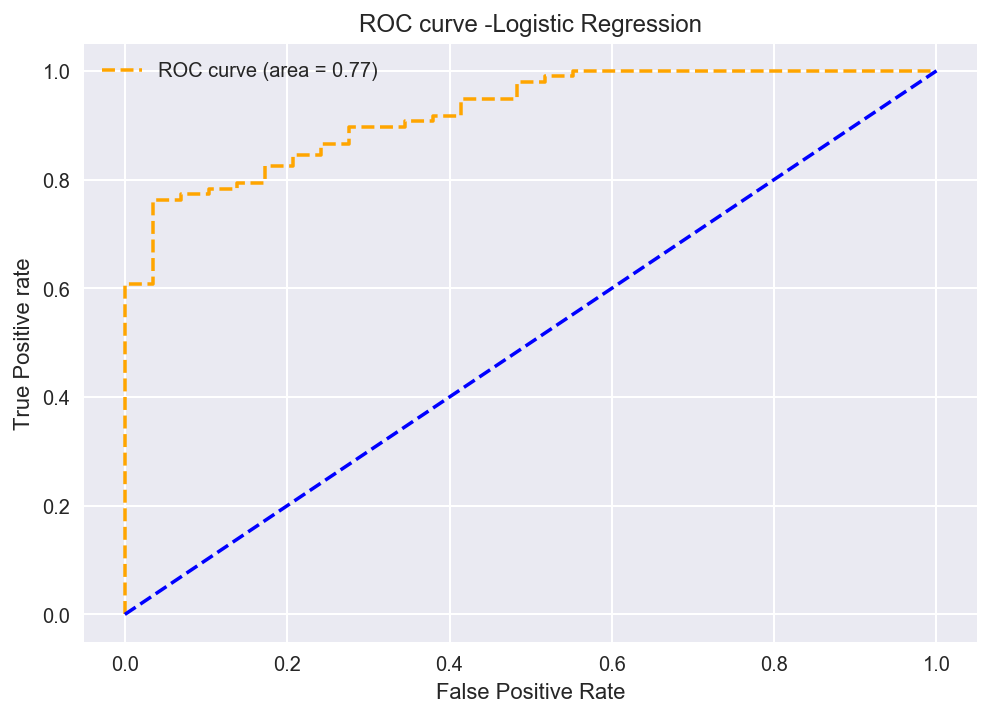

In [56]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange',label='ROC curve (area = %0.2f)' % Lf_valid_auc)

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve -Logistic Regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### CLASSIFICATION REPORT OF LOGISTIC REGRESSION

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
# Computing precision, recall and F1 score for validation data
print(classification_report(y_train_predictions,y_trainE))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72        89
           1       0.95      0.92      0.93       412

    accuracy                           0.89       501
   macro avg       0.81      0.85      0.82       501
weighted avg       0.90      0.89      0.89       501



### FEATURE IMPORTANCES


For RANDOM FOREST, the variables with highest positive coefficients are predictive of Alzeihmers and the variables with 
highest negative coefficients are predictive of not having alzeihmers. We can plot the top 10 for each direction below

In [48]:

X_training_a=pd.DataFrame(X_trainE,columns=['AGE',        'PTEDUCAT',           'APOE4',
                  'MMSE',          'Female',            'Male',
           'Hisp/Latino', 'Not Hisp/Latino',         'Unknown',
                 'Asian',           'Black',           'White',
                   False,              True,             '2,2',
                   '2,3',             '2,4',             '3,3',
                   '3,4',             '4,4']
                                            )

In [49]:
features = pd.DataFrame()
features['feature'] = X_training_a.columns
features['importance'] = rf_clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

In [50]:
feature_importances = pd.DataFrame(rf_clf.feature_importances_, index=X_training_a.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances[:10])

          Importance
MMSE        0.523126
AGE         0.213662
PTEDUCAT    0.115581
APOE4       0.022703
Female      0.016213
Male        0.012902
False       0.012628
3,3         0.012056
True        0.011960
4,4         0.011919


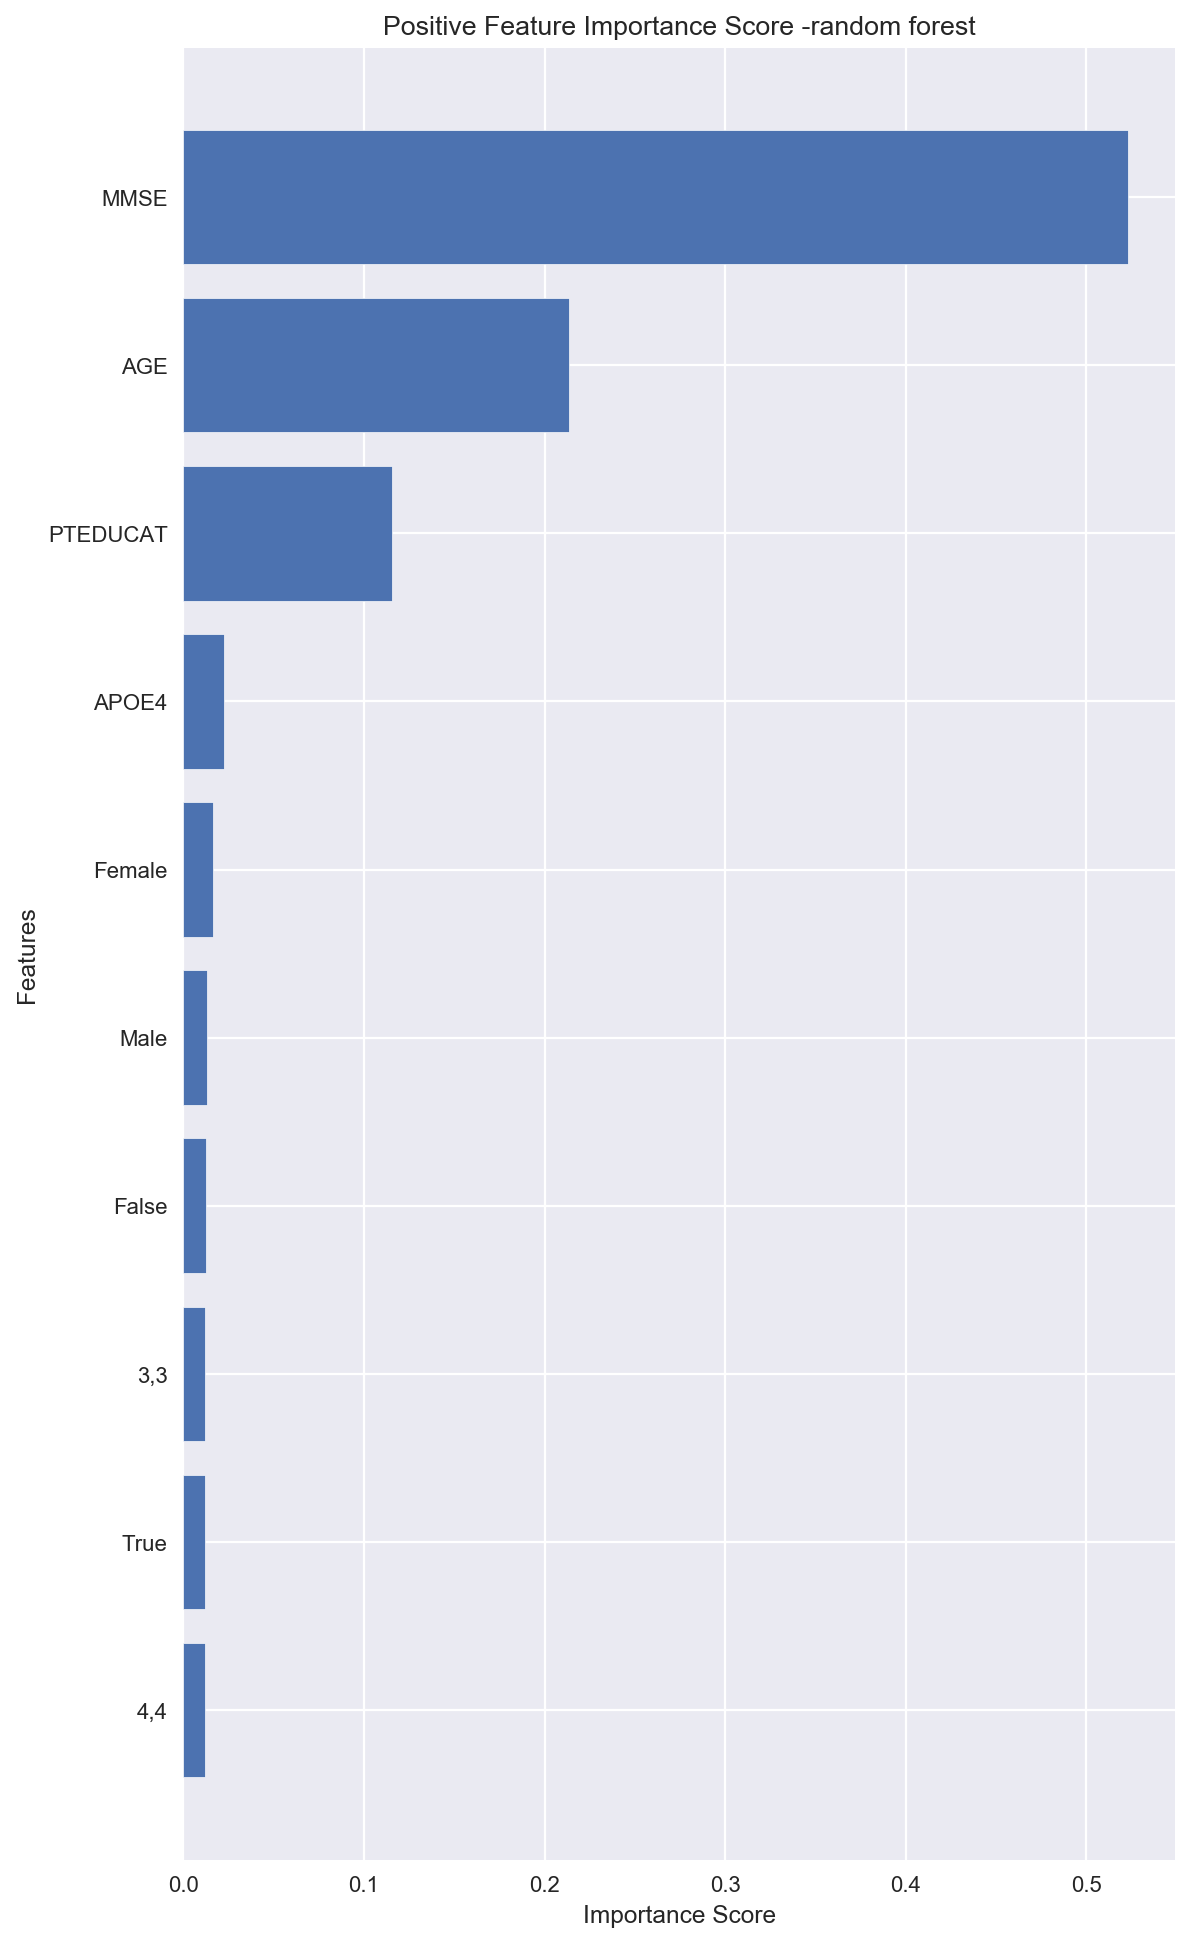

In [51]:
num = 10
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score -random forest')
plt.yticks(ylocs, feature_labels)
plt.show()

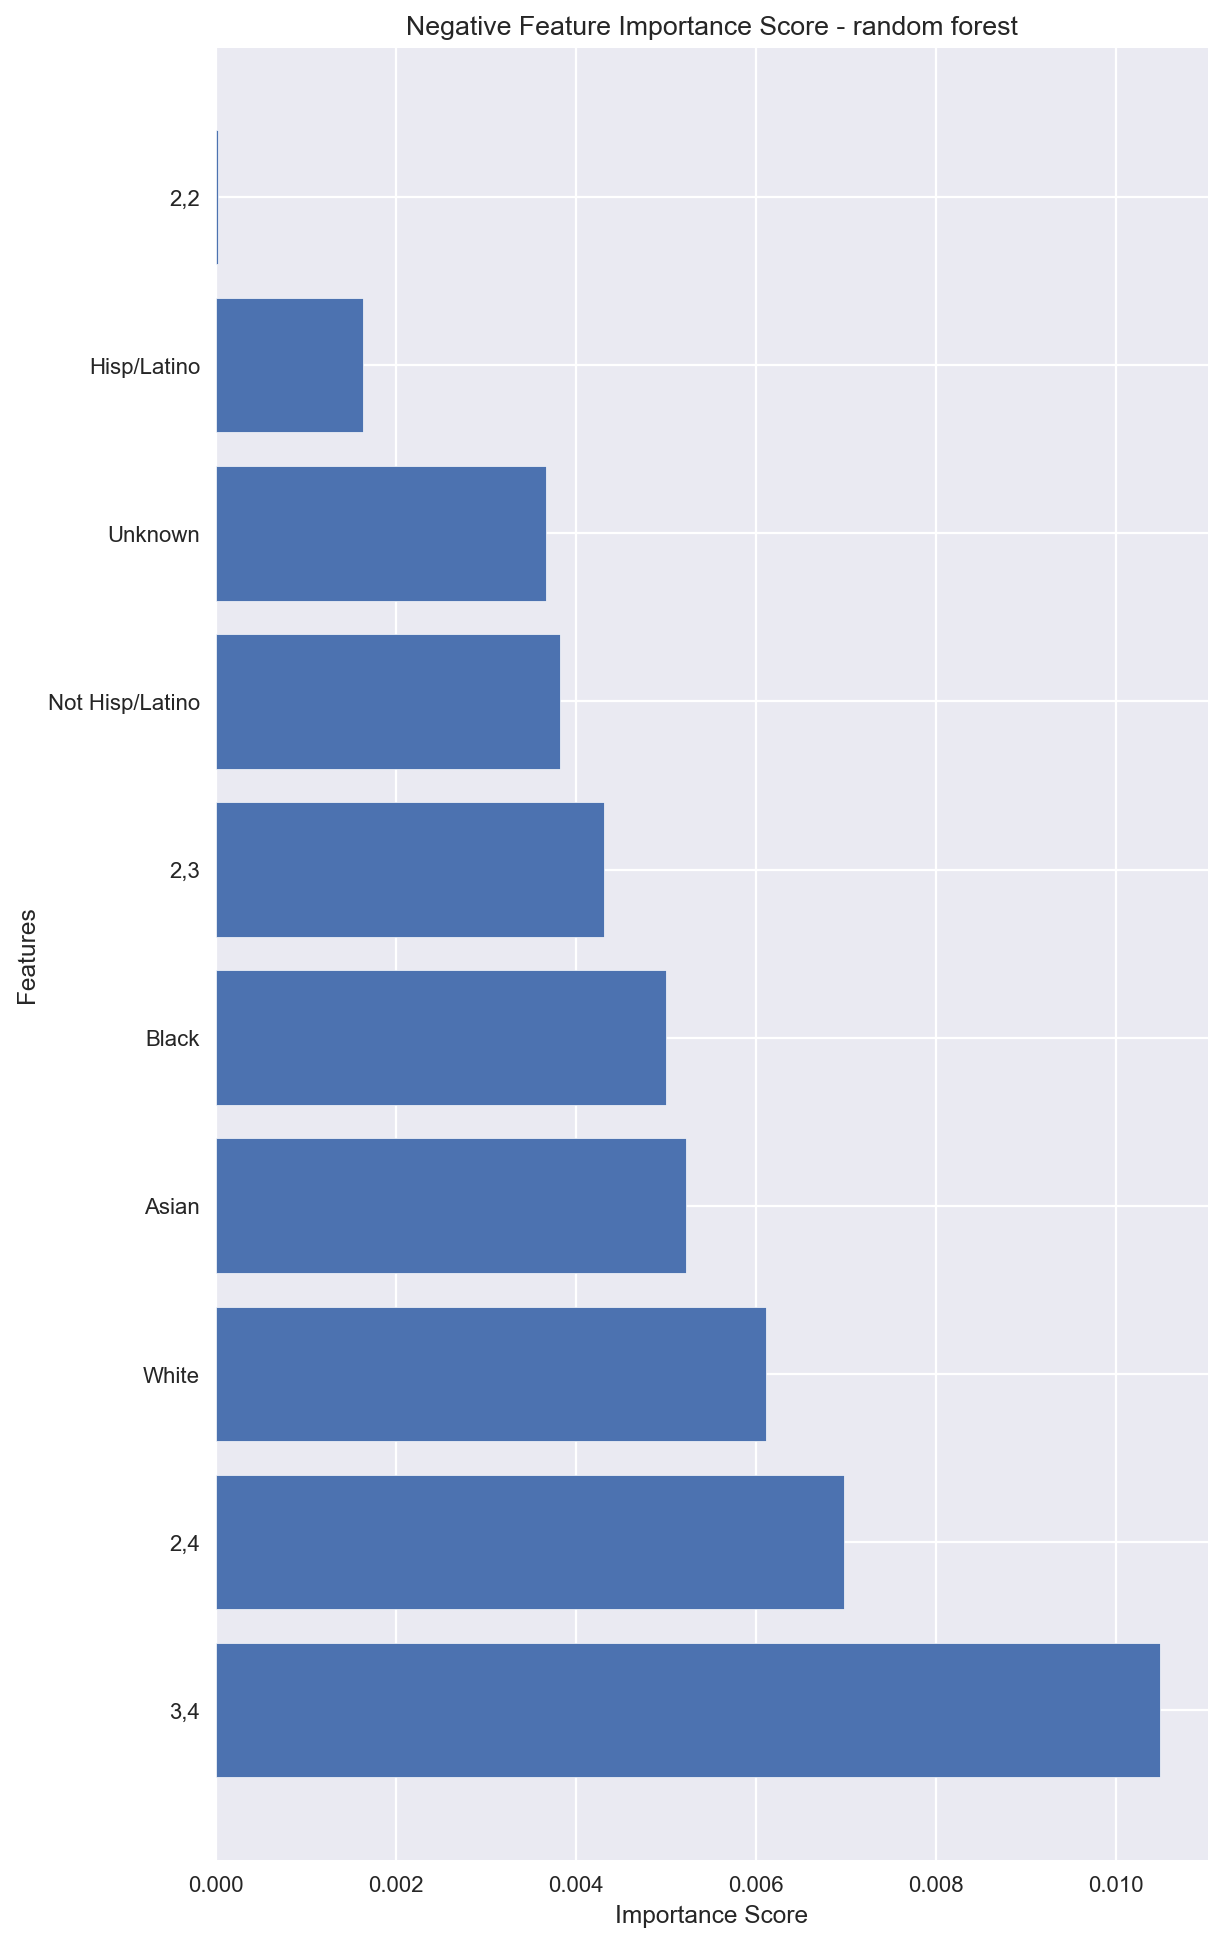

In [52]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - random forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### HYPERPARAMETER OPTIMIZATION -Random Forest Classifier - with GridSearchCV

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 6, 8, 10, 30, 50, 70, 100],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'n_estimators': [100, 200, 300, 500, 1000, 2000]
}
rfc = RandomForestClassifier(random_state=42)
rfc_mod = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                        cv = 3, n_jobs = -1, verbose = 2)

rfc_mod.fit(X_trainE, np.ravel( y_trainE))
#print("Best Parameters: ",model.best_params_)
print("Best estimator: ",rfc_mod.best_estimator_)
#print("Highest Accuracy obtained: ",model.best_score_)
#X_trainE, y_trainE

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best estimator:  RandomForestClassifier(max_depth=10, min_samples_leaf=8, n_estimators=1000)


In [54]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
y_pr = rfc_mod.best_estimator_.predict(X_testE)
y_pred = [round(value) for value in y_pr]
conf_matrix = confusion_matrix(np.ravel(y_testE), y_pred)
print(" Random Forest after hyperparameter tuning is")
print("Accuracy of %2.3f" % accuracy_score(np.ravel(y_testE), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_testE), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_testE), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_testE), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

 Random Forest after hyperparameter tuning is
Accuracy of 0.865
Recall is 0.990
Precision is 0.857
Roc_auc_score is 0.719
Confusion Matrix :
[[13 16]
 [ 1 96]]
